Отсчеты сигнала хранятся в памяти, путем последовательно вычитания значений можно воспроизвести сигнал. Если увеличивать шаг, с которым читаются отсчеты из памяти, то можно получить сигнал другой частоты.

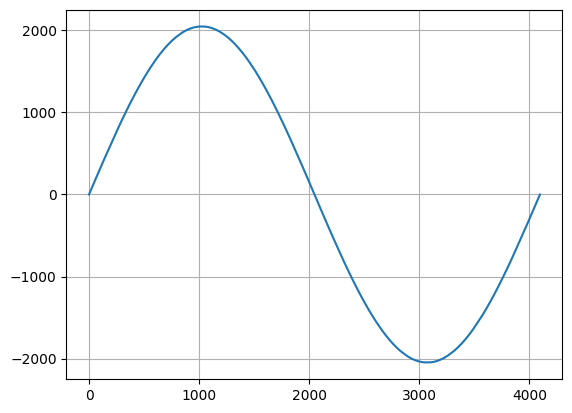

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

%matplotlib inline

signal_width = 12
mem_size = 2**signal_width
phase = np.linspace(0.0, 2*np.pi, mem_size)
amplitude = 2**(signal_width-1) - 1
mem_samples = np.array(amplitude * np.sin(phase))
mem_samples = np.floor(mem_samples)

plt.plot(mem_samples)
plt.grid()

Разрешение по частоте: 11.71875 Гц


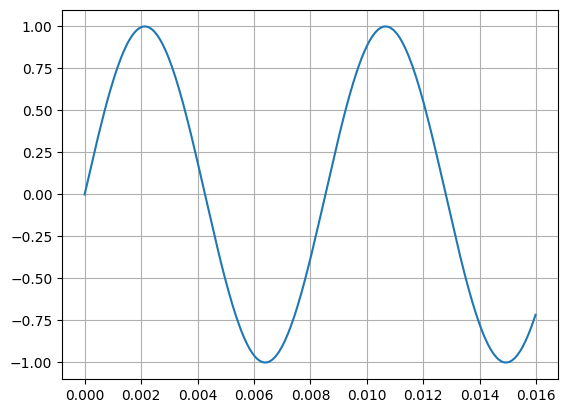

In [94]:
acc = 0

fd = 48e3
freq = 125
n = 100000

num_point_per_period = int(fd / freq)
df = fd / 2**signal_width
step = int(np.floor(2**signal_width * freq / fd))

print(f'Разрешение по частоте: {df} Гц')

output = []
for _ in range(n):

    output.append(mem_samples[acc])
    acc += step

    if acc >= (2**signal_width - 1):
        acc -= (2**signal_width - 1)

time = np.linspace(0.0, 2*num_point_per_period/fd, 2*num_point_per_period, endpoint=False)
output = np.array(output) / np.max(output)

plt.plot(time, output[:2*num_point_per_period])
plt.grid()

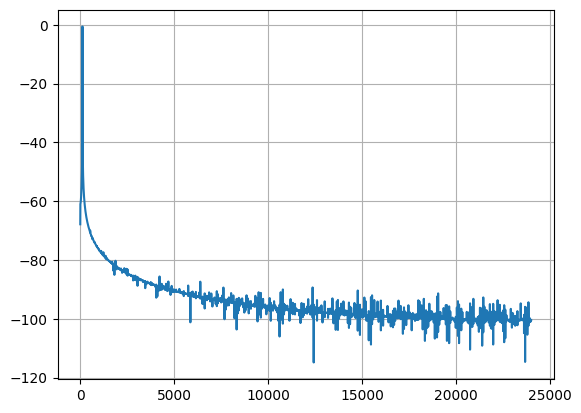

In [95]:
fft = rfft(output) * 2 / n
freqs = rfftfreq(n, 1 / fd)

plt.plot(freqs, 20 * np.log10(np.abs(fft)))
plt.grid()

Так как гармоническая функция симметричная, то можно сократить количество памяти, необходимой для хранения отсчетов сигнала в 4 раза.

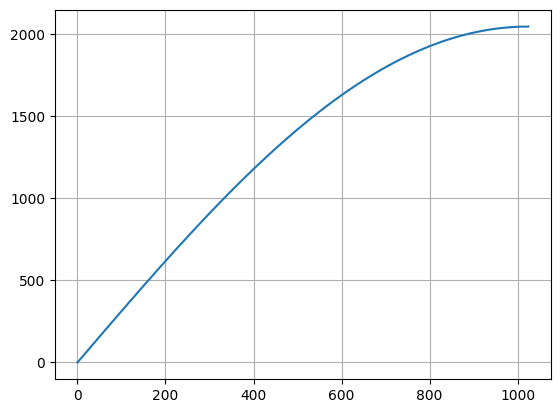

In [96]:
mem_size = int(2**signal_width/4)
phase = np.linspace(0.0, np.pi/2, mem_size+1)
mem_samples = np.array(amplitude * np.sin(phase))
mem_samples = np.floor(mem_samples)

plt.plot(mem_samples)
plt.grid()

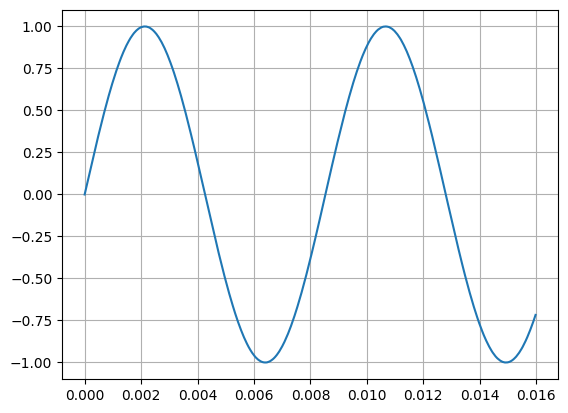

In [97]:
first_quarter = 0
second_quarter = np.floor(2**signal_width / 4)
third_quarter = np.floor(2**signal_width / 2)
fourth_quarter = np.floor(3 * 2**signal_width / 4)

acc = 0

output = []
for _ in range(n):

    addr = acc

    if addr >= first_quarter and addr < second_quarter:
        output.append(mem_samples[addr])

    elif addr >= second_quarter and addr < third_quarter:
        addr = int(2**signal_width / 2 - addr)
        output.append(mem_samples[addr])

    elif addr >= third_quarter and addr < fourth_quarter:
        addr = int(addr - (2**signal_width / 2))
        output.append(-mem_samples[addr])
        
    elif addr >= fourth_quarter:
        addr = int(2**signal_width - addr)
        output.append(-mem_samples[addr])

    acc += step

    if acc >= (2**signal_width - 1):
        acc -= (2**signal_width - 1)

output = np.array(output) / np.max(output)

plt.plot(time, output[:2 * num_point_per_period])
plt.grid()

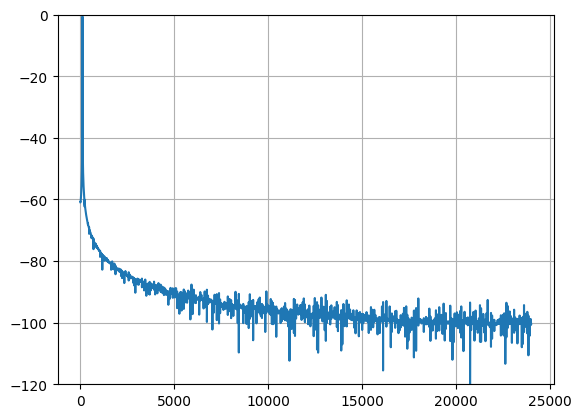

In [98]:
fft = rfft(output) * 2 / n
freqs = rfftfreq(n, 1 / fd)

plt.plot(freqs, 20 * np.log10(np.abs(fft)))
plt.ylim(-120, 0)
plt.grid()